#### DATA COLLECTION

In [1]:
import bs4
import requests
from selenium import webdriver
import os
import time
import io
from PIL import Image

In [2]:
folder_name_ai = 'ai_images'
if not os.path.isdir(folder_name_ai):
    os.makedirs(folder_name_ai)
folder_name_real = 'real_images'
if not os.path.isdir(folder_name_real):
    os.makedirs(folder_name_real)

In [3]:
def download_image(url, name):
    reponse = requests.get(url)
    if reponse.status_code==200:
        with open(os.path.join('./Webscraping/',name+".jpg"), 'wb') as file:
            file.write(reponse.content)

In [4]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By

In [5]:
driver=webdriver.Chrome()
url = 'https://www.google.com/search?q=ai+generated+images&tbm=isch'
driver.get(url)
xPath = """//*[@id="islrg"]/div[1]/div[%s]"""%(1)
driver.find_element(By.XPATH,xPath).click()

In [7]:
def download(url,name,num_images=50):
    driver.get(url)
    for i in range(1, num_images+1):
        if i % 25 == 0:
            continue
        previewImageXPath = """//*[@id="islrg"]/div[1]/div[%s]/a[1]/div[1]/img"""%(i)
        previewImageElement = driver.find_element(By.XPATH,previewImageXPath)
        previewImageURL = previewImageElement.get_attribute("src")

        xPath = """//*[@id="islrg"]/div[1]/div[%s]"""%(i)
        driver.find_element(By.XPATH,xPath).click()

        timeStarted = time.time()
        while True:
            try:
                imageElement = driver.find_element(By.XPATH,"""//*[@id="Sva75c"]/div[2]/div/div[2]/div[2]/div[2]/c-wiz/div/div/div/div[3]/div[1]/a/img[1]""")
                imageURL= imageElement.get_attribute('src')

                if imageURL != previewImageURL:
                    break
                else:
                    currentTime = time.time()
                    if currentTime - timeStarted > 10:
                        print("Timeout! Will download a lower resolution image and move onto the next one")
                        break
            except:
                print("No such image %s found,continuing downloading the previous one"%(i))
                break


        #Downloading image
        try:
            download_image(imageURL, name+str(i))
            print("Downloaded element %s out of %s total. URL: %s" % (i, num_images , imageURL))
        except:
            print("Couldn't download an image %s, continuing downloading the next one"%(i))

In [8]:
driver=webdriver.Chrome()
url = 'https://www.google.com/search?q=ai+generated+images&tbm=isch'
download(url,"AIGeneratedImages",num_images=50)

Downloaded element 1 out of 50 total. URL: https://static.toiimg.com/thumb/msid-96715731,width-400,resizemode-4/96715731.jpg
Downloaded element 2 out of 50 total. URL: https://c.ndtvimg.com/2023-03/ts9dtkq8_selfies-from-the-past_625x300_21_March_23.jpg
Downloaded element 3 out of 50 total. URL: https://www.shethepeople.tv/wp-content/uploads/2022/12/AI-Generated-Images.jpeg
Downloaded element 4 out of 50 total. URL: https://cdn.dnaindia.com/sites/default/files/styles/full/public/2023/02/11/2572264-untitled-design-1.jpg
Downloaded element 5 out of 50 total. URL: https://cdn.siasat.com/wp-content/uploads/2023/05/RK-AI.jpg
Downloaded element 6 out of 50 total. URL: https://m.economictimes.com/thumb/msid-96622207,width-1200,height-900,resizemode-4,imgsize-17564/ai-women.jpg
Downloaded element 7 out of 50 total. URL: https://images.mygoodtimes.in/wp-content/uploads/2023/04/24135749/WhatsApp-Image-2023-04-24-at-1.57.19-PM.jpeg
Downloaded element 8 out of 50 total. URL: https://c.ndtvimg.com/2

###### TO WEBSCRAPE IMAGE FROM WE HAVE OBSERVED A PATTERN IN XPATHS.FIRSTLY FOR A IMAGE THERE WILL BE TWO URLS.FIRST THERE WILL BE LOWER RES URL THAT WILL BE FOUND QUICKLY HOWEVER THE HIGHER RES ULR WILL TAKE TIME TO LOAD.AS SSON AS IT LOAD WE DOWNLOAD IT OTHERWISE WE DOWNLOAD THE LOWER RES IMAGE.ALSO AFTER EVERY 25 IMAGES THERE ARE NON IMAGE CONTAINERS SO WE HAVE TO SKIP THEM

###### BUT USING THIS METHOD THERE ARE NON UNIFORMITIES IN TAGS AND ALSO WE DONT HAVE A LOT OF RELEVANT PICTURES ON GOOGLE IMAGES

In [9]:
from pygoogle_image import image as pi


In [42]:
pi.download(keywords='ai generated images', limit=100, directory='./ai_images/')
pi.download(keywords='dalle2 generated images', limit=100, directory='./ai_images/')

[========================================================================] 100%
[========================================================================] 100%


In [43]:
pi.download(keywords='animals', limit=100, directory='./real_images/')
pi.download(keywords='humans', limit=100, directory='./real_images/')
pi.download(keywords='cityscape', limit=100, directory='./real_images/')


[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%


#### DATA PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2 as cv
import os
import PIL
import pickle
import pathlib
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add


In [4]:
# import numpy as np
# a = np.array( [10,10,20,10,20,20,20,30, 30,50,40,40] )
# print("Original array:")
# print(a)
# unique_elements, counts_elements = np.unique(a, return_counts=True)
# print("Frequency of unique values of the said array:")
# print(np.asarray((unique_elements, counts_elements)))

Original array:
[10 10 20 10 20 20 20 30 30 50 40 40]
Frequency of unique values of the said array:
[[10 20 30 40 50]
 [ 3  4  2  2  1]]


In [41]:
pict_size=36;
data_dir="./train/"
Type=['FAKE','REAL']
val={'FAKE':0,'REAL':1}
final={0:'FAKE',1:'REAL'}

###### FAKE CORRESPONDS TO AI GENERATED IMAGE 

In [4]:
Training_data=[]

##### LOADING DATASET

In [7]:
lis=[]
for categ in Type:
    Files=os.listdir(data_dir+categ+"/")
    i=1
    for file in Files:
        imgpath=os.path.join(data_dir+categ+"/",file)
        lis.append(imgpath)
        image=cv.imread(imgpath)
        img=cv.imread(str(lis[-1]))
        try:
            new_img=cv.resize(img,(pict_size,pict_size))
            new_img=new_img/255
            Training_data.append([new_img,val[categ]])
        except:
            print("Not able to preprocess")
        print(i)
        i=i+1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


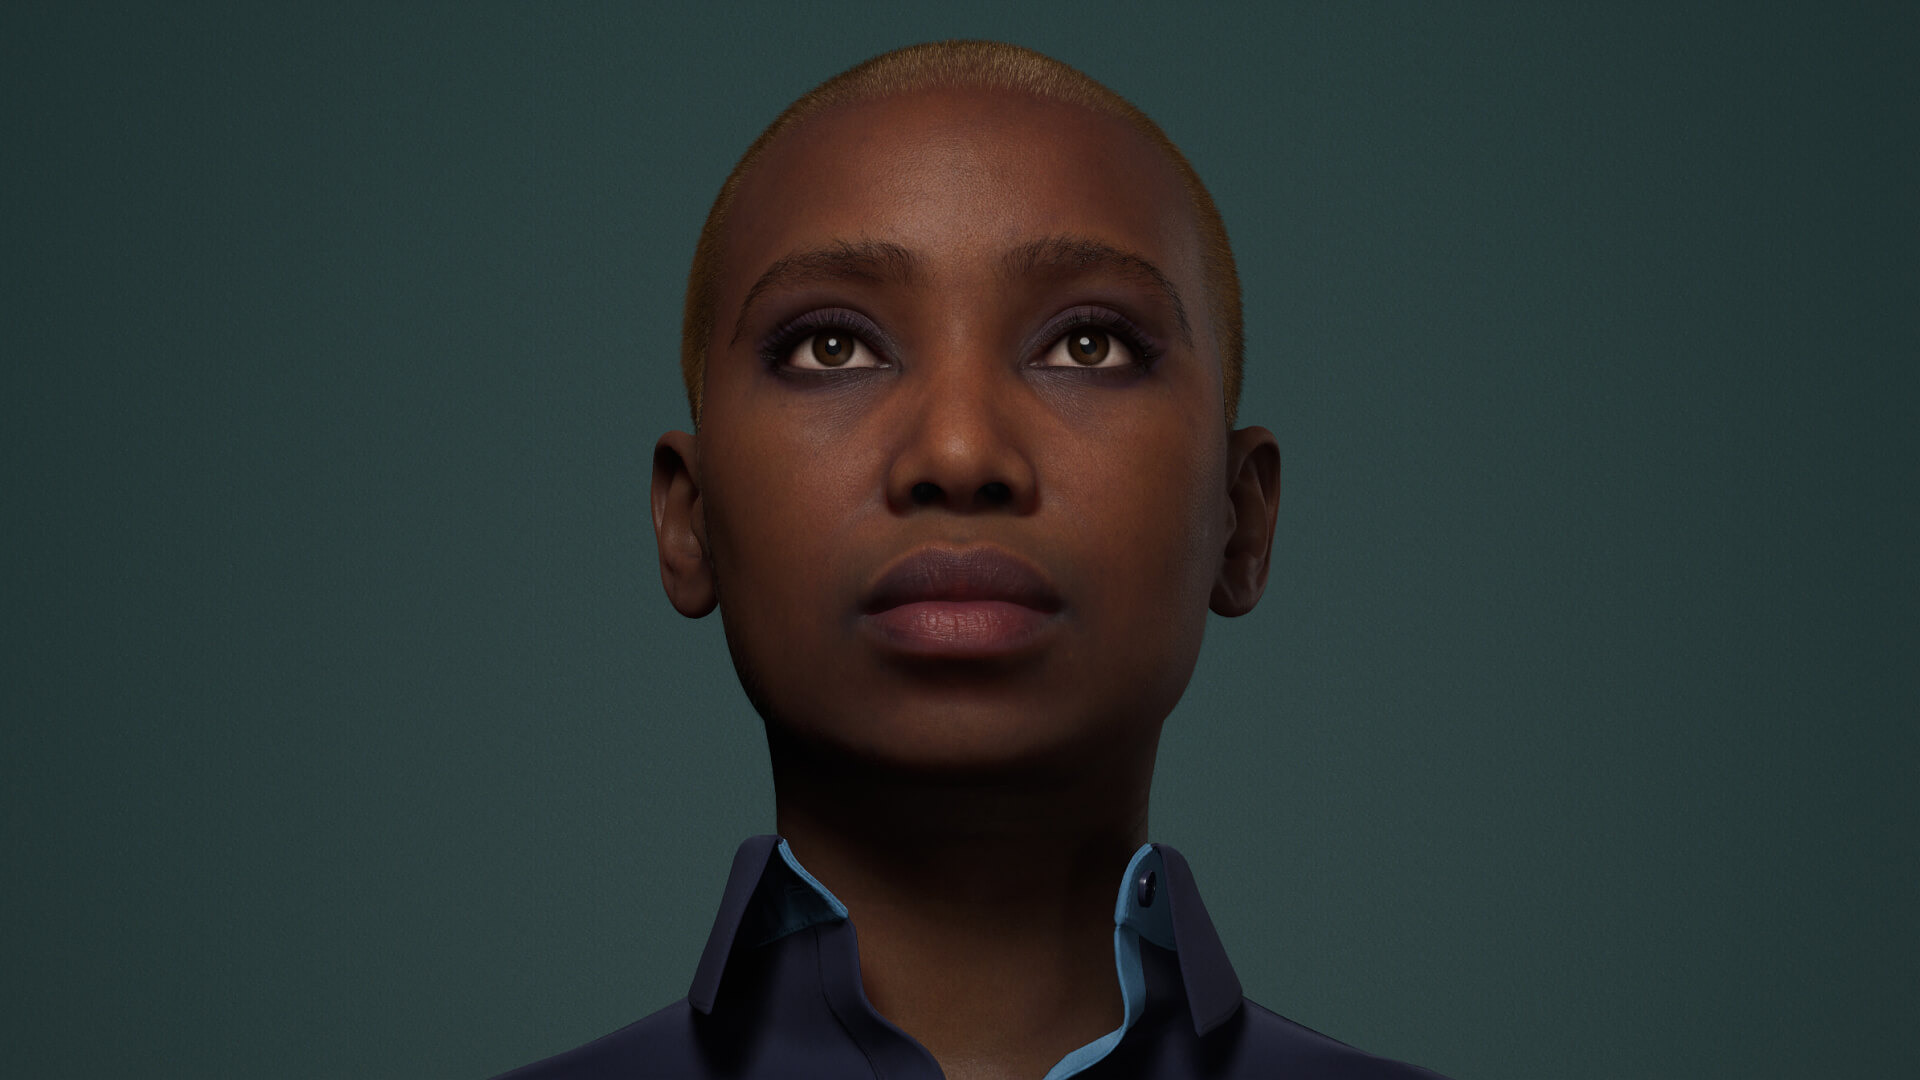

In [8]:
PIL.Image.open(str(lis[-1]))

In [9]:
Training_data[-1][1]

1

In [10]:
import random
random.shuffle(Training_data)

In [13]:
for i in range(0,10):
    print(Training_data[i][0])

[[[0.1254902  0.2627451  0.20784314]
  [0.17254902 0.31372549 0.25882353]
  [0.18823529 0.34509804 0.28235294]
  ...
  [0.85882353 0.7372549  0.67058824]
  [0.85098039 0.72156863 0.64705882]
  [0.8627451  0.73333333 0.65882353]]

 [[0.13333333 0.31372549 0.23529412]
  [0.15686275 0.34901961 0.2627451 ]
  [0.14509804 0.35294118 0.26666667]
  ...
  [0.85490196 0.75686275 0.68235294]
  [0.85098039 0.75294118 0.6745098 ]
  [0.85882353 0.76078431 0.67843137]]

 [[0.09411765 0.37254902 0.24313725]
  [0.11372549 0.39607843 0.26666667]
  [0.10196078 0.4        0.26666667]
  ...
  [0.85098039 0.80392157 0.70588235]
  [0.83921569 0.80392157 0.70196078]
  [0.83529412 0.8        0.69803922]]

 ...

 [[0.12941176 0.63921569 0.53333333]
  [0.12941176 0.64313725 0.52941176]
  [0.12941176 0.63921569 0.52941176]
  ...
  [0.20784314 0.58431373 0.57254902]
  [0.21176471 0.58431373 0.57647059]
  [0.21176471 0.58431373 0.57647059]]

 [[0.08235294 0.56078431 0.45098039]
  [0.08235294 0.56470588 0.45098039]


In [14]:
len(Training_data)

100499

In [49]:
X_Train=[]
Y_Train=[]

In [50]:
for i in range(0,len(Training_data)):
    X_Train.append(Training_data[i][0])
    Y_Train.append(Training_data[i][1])
# X=np.array(X)
# Y=np.array(Y)

In [51]:
len(X_Train)

100499

In [52]:
len(Y_Train)

100499

In [53]:
X_Train=np.array(X_Train)
Y_Train=np.array(Y_Train)

In [54]:
# import numpy as np
# a = np.array( [10,10,20,10,20,20,20,30, 30,50,40,40] )
# print("Original array:")
# print(a)
unique_elements, counts_elements = np.unique(Y_Train, return_counts=True)
print("Frequency of unique values of the Train Set:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the Train Set:
[[    0     1]
 [50208 50291]]


In [41]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X_Train,pickle_out)
pickle_out.close()

pickle_out=open("Y.pickle","wb")
pickle.dump(Y_Train,pickle_out)
pickle_out.close()

##### MODEL DESIGNING

In [2]:
X_Train=pd.read_pickle('X.pickle')
Y_Train=pd.read_pickle('Y.pickle')

In [7]:
X_Train
Y_Train
len(Y_Train)

100499

In [3]:
X_Train[0].shape
Y_Train[0]

0

In [8]:
model=models.Sequential([
        layers.Conv2D(filters=80,kernel_size=(3,3),padding='same',activation='relu',input_shape=(36,36,3)),
        layers.MaxPool2D((2,2)),
        layers.Dropout((0.2)),
        layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
        layers.MaxPool2D((2,2)),
        layers.Dropout((0.2)),
        layers.Conv2D(filters=40,kernel_size=(3,3),padding='same',activation='relu'),
        layers.MaxPool2D((2,2)),
        layers.Dropout((0.1)),
        layers.Conv2D(filters=20,kernel_size=(3,3),padding='same',activation='relu'),
        layers.MaxPool2D((2,2)),
        layers.Dropout((0.1)),
        
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(48,activation='relu'),
        layers.Dropout(0.2),
        
        layers.Dense(2,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

###### FILTERS HELP IN EXTRACTING FEATURES FROM THE IMAGES AND THEIR SIZE IS DENOTED BY KERNEL SIZE.
###### STRIDE IS FOR SHIFTING OUR KERNEL BY HOW MANY POSITIONS.
###### MAXPOOLING 2D HELPS IN SIZE REDUCTION USING MAX 
###### PADDING HELPS IN CAPTURING THE FEATURES LOCATED AT EDGES AND CORNERS AND ENFORCES THEIR CONTRIBUTION.


In [9]:
model.fit(X_Train,Y_Train,epochs=10)

Epoch 1/10
3141/3141 [==============================] - 319s 101ms/step - loss: 0.3913 - accuracy: 0.8247
Epoch 2/10
3141/3141 [==============================] - 315s 100ms/step - loss: 0.2718 - accuracy: 0.8890
Epoch 3/10
3141/3141 [==============================] - 312s 99ms/step - loss: 0.2429 - accuracy: 0.9017
Epoch 4/10
3141/3141 [==============================] - 313s 100ms/step - loss: 0.2243 - accuracy: 0.9097
Epoch 5/10
3141/3141 [==============================] - 314s 100ms/step - loss: 0.2111 - accuracy: 0.9148
Epoch 6/10
3141/3141 [==============================] - 315s 100ms/step - loss: 0.2004 - accuracy: 0.9202
Epoch 7/10
3141/3141 [==============================] - 317s 101ms/step - loss: 0.1933 - accuracy: 0.9241
Epoch 8/10
3141/3141 [==============================] - 313s 100ms/step - loss: 0.1871 - accuracy: 0.9271
Epoch 9/10
3141/3141 [==============================] - 314s 100ms/step - loss: 0.1798 - accuracy: 0.9289
Epoch 10/10
3141/3141 [========================

In [10]:
model.save("Model.h5")

In [13]:
model=keras.models.load_model("./Model.h5")

##### TESTING RESULTS

In [19]:
data_test_dir="./test/"
Testing_data=[]


In [20]:
lis=[]
for categ in Type:
    Files=os.listdir(data_test_dir+categ+"/")
    i=1
    for file in Files:
        imgpath=os.path.join(data_test_dir+categ+"/",file)
        lis.append(imgpath)
        image=cv.imread(imgpath)
        img=cv.imread(str(lis[-1]))
        try:
            new_img=cv.resize(img,(pict_size,pict_size))
            new_img=new_img/255
            Testing_data.append([new_img,val[categ]])
        except:
            print("Not able to preprocess")
        print(i)
        i=i+1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


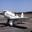

In [22]:
PIL.Image.open(str(lis[-1]))

In [21]:
len(Testing_data)

20000

In [23]:
X_Test=[]
Y_Test=[]
for i in range(0,len(Testing_data)):
    X_Test.append(Testing_data[i][0])
    Y_Test.append(Testing_data[i][1])
X_Test=np.array(X_Test)
Y_Test=np.array(Y_Test)
print(X_Test.shape)
print(Y_Test.shape)

(20000, 36, 36, 3)
(20000,)


In [31]:
X_Test[0].shape

(36, 36, 3)

In [35]:
y_pred=model.predict(X_Test)
y_pred.shape

625/625 [==============================] - 12s 19ms/step


(20000, 2)

In [37]:
y_pred

array([[0.99435705, 0.0017307 ],
       [0.65428233, 0.13347094],
       [0.7819818 , 0.17232306],
       ...,
       [0.38218364, 0.96685886],
       [0.06942881, 0.99638754],
       [0.65378684, 0.20860246]], dtype=float32)

In [36]:

for i in range(len(y_pred)):
    print(y_pred[i][0],y_pred[i][1])

0.99435705 0.0017306991
0.65428233 0.13347094
0.7819818 0.17232306
0.997922 0.0015737303
0.90215325 0.07300123
0.79866695 0.09543417
0.9885102 0.0010078999
0.99835926 8.800467e-05
0.81601304 0.23019752
0.8892638 0.017311376
0.65271765 0.1384805
0.8016313 0.14498037
0.6914781 0.13442323
0.797471 0.06650399
0.9057002 0.0030240517
0.96122724 0.017589586
0.9451737 0.0033044117
0.9092836 0.009899218
0.7296472 0.0718331
0.7875788 0.04143823
0.9364607 0.03150323
0.9123124 0.07092954
0.97116685 0.011321998
0.7238336 0.09046333
0.6605985 0.17905486
0.48006758 0.69397056
0.63737977 0.14960818
0.97662973 0.0035897016
0.95118636 0.024516627
0.4710827 0.6051655
0.78988785 0.17470393
0.8000669 0.17914224
0.47212785 0.72520214
0.88641626 0.021303078
0.5016795 0.5943539
0.9984144 0.0007906273
0.6846176 0.107429355
0.8278357 0.010028557
0.60043186 0.42598245
0.66738445 0.09663045
0.9140094 0.15429638
0.8923981 0.041213546
0.5342892 0.79448336
0.9064909 0.020138148
0.9041237 0.022680882
0.8384421 0.0395

In [41]:
Y_Pred=[]
for i in range(len(y_pred)):
    y_hat=np.argmax(y_pred[i])
    Y_Pred.append(y_hat)

In [42]:
Y_Pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(Y_Test,Y_Pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     10000
           1       0.92      0.96      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



In [46]:
Y_Test[0], Y_Pred[0]

(0, 0)

In [14]:
test_dir="./test.jpeg.jpg"

In [33]:
Test=[]

In [34]:

lis=[]
data_test_dir="./Testing/"
Files=os.listdir(data_test_dir)
i=1
for file in Files:
    imgpath=os.path.join(data_test_dir,file)
    lis.append(imgpath)
    image=cv.imread(imgpath)
    img=cv.imread(str(lis[-1]))
    try:
        new_img=cv.resize(img,(pict_size,pict_size))
        new_img=new_img/255
        Test.append(new_img)
    except:
        print("Not able to preprocess")
    print(i)
    i=i+1

1


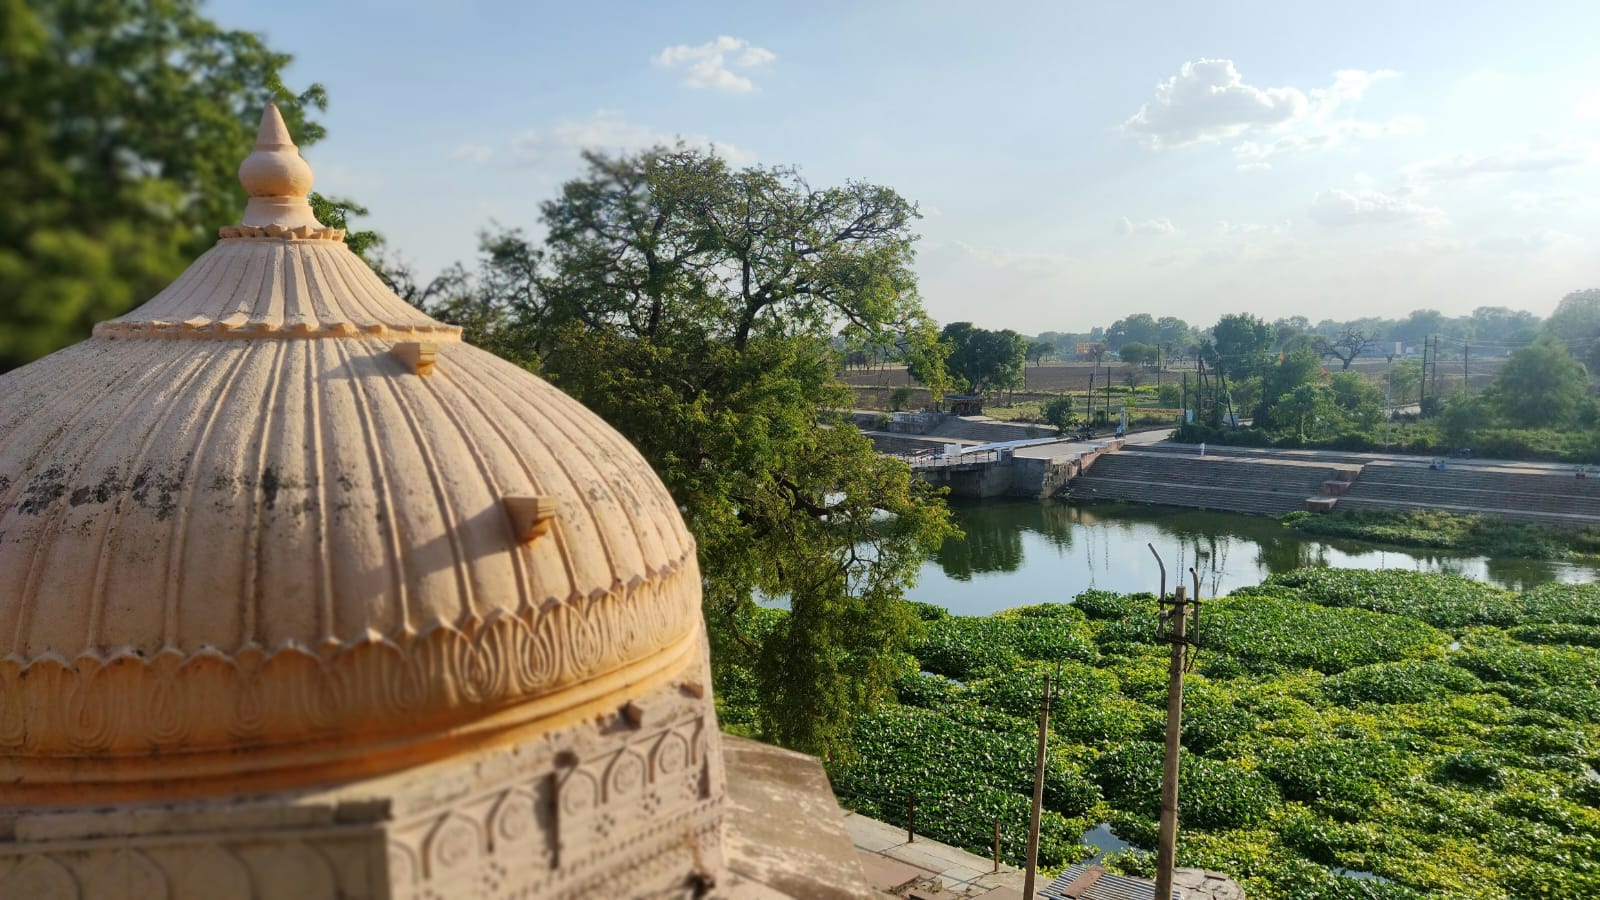

In [36]:
PIL.Image.open(str(lis[-1]))

In [37]:
Test=np.array(Test)
Test.shape

(1, 36, 36, 3)

In [ ]:
y_pred=model.predict(Test)
y_hat=np.argmax(y_pred[0])
print(final[y_hat])